# Explortary data analysis (EDA) of house prices dataset

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from pandas.api.types import CategoricalDtype
from scipy import stats

plt.style.use('ggplot')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [51]:
df = pd.read_csv('./house-prices-advanced-regression-techniques/train.csv', index_col=0)

### Step 1: data understanding
* df shape
* head, tail
* dtypes
* describe


In [52]:
df.shape

(1460, 80)

In [53]:
df.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [54]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [55]:
# Note I am coding in VSCode and have set the output to scroll (Preferences > settings > Notebook Output: scrolling)
# If you are using a different editor you may wish to find similar settings to stop the output length becoming ridiculous
df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


In [56]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Set 2: Data Preperation
* identifying duplicate columns/rows
* Encoding catagorical data
* Measuring mutual information
* dropping irrlevant columns
* renaming columns (if required)
* finding missing values


First things first, I read the data_description.txt file and decides whether variables were nominal catagorical, order catagorical, discrete numerical or continuous numerical columns. I then encoded the catagorical data accordingly.

In [57]:
df.loc[df.duplicated()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


Yay no duplicates!

In [58]:
# The nominative (unordered) categorical features
nom_cats = ["MSSubClass", "MSZoning", "Street", "Alley", 'LotShape',
                "LandContour", "LotConfig", "Neighborhood", 
                "Condition1", "Condition2", "BldgType", 
                "HouseStyle", "RoofStyle", "RoofMatl", 
                "Exterior1st", "Exterior2nd", "MasVnrType", 
                "Foundation", "Heating", "CentralAir", 
                "GarageType", "MiscFeature", "SaleType", 
                "SaleCondition", 'Electrical'
                ]

ten_lvls = list(range(10))
five_lvls = ['Po', 'Fa', 'TA', 'Gd', 'Ex']

ordered_cats = {
    'Utilities' : ['ELO', 'NoSeWa', 'NoSewr', 'AllPub'],
    'LandSlope' : ['Sev', 'Mod', 'Gtl'],
    'OverallQual' : ten_lvls,
    'OverallCond' : ten_lvls,
    'ExterQual' : five_lvls,
    'ExterCond' : five_lvls,
    'BsmtQual' : five_lvls,
    'BsmtCond' : five_lvls,
    'BsmtExposure' : ['No', 'Mn', 'Av', 'Gd'],
    'BsmtFinType1' : ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'BsmtFinType2' : ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'HeatingQC' : five_lvls,
    'KitchenQual' : five_lvls,
    'Functional' : ['Sal' , 'Sev' , 'Maj2', 'Maj1' , 'Mod', 
                    'Min2', 'Min1', 'Typ'],
    'FireplaceQu' : five_lvls,
    'GarageFinish' : ['Unf', 'RFn', 'Fin'],
    'GarageQual' : five_lvls,
    'GarageCond' : five_lvls,
    'PavedDrive': ['N', 'P', 'Y'],
    'PoolQC' : five_lvls,
    'Fence' : ['MnWw' , 'GdWo', 'MnPrv', 'GdPrv'],
}

# Add a None level for missing values
ordered_cats = {key: ["None"] + value for key, value in
                  ordered_cats.items()}

In [59]:
df.shape

(1460, 80)

In [60]:
df.isna().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

I will perform a very simple imputation here. A column by column basis is probably more appropriate but this methods makes for a cheap and easy starting methods, allowing me to start measuring mutual information etc. 

Later, I will look at imputation of different valeus indiviually. Eg dropping 'Alley' might be beneficitial because most values are missing in this column (similarly with PoolQC, Fence, MiscFeature). Also imputing 'LotFrontage' as, 0 like I do here, is clearly wrong but again just providies a way for me to begin.

In [61]:
def encode(df, nom_cats, ordered_cats):
    df = df.copy()
    # Nominal categories
    for name in nom_cats:
        df[name] = df[name].astype("category")
        # Add a None category for missing values
        if "None" not in df[name].cat.categories:
            df[name] = df[name].cat.add_categories("None")
    # Ordinal categories
    for name, levels in ordered_cats.items():
        df[name] = df[name].astype(CategoricalDtype(levels,
                                                    ordered=True))
    return df

def impute(df):
    '''
    Trivial imputation used to help progress with analysis:

    A missing number is likely because the feature isn't present. 
    This may not be true for all values (Eg LotFrontage) but, this
    simple initial approach allows me to get started with other 
    anlysis. I will do a full exploratation of imputation later.
    '''
    for name in df.select_dtypes("number"):
        df[name] = df[name].fillna(0)
    for name in df.select_dtypes("category"):
        df[name] = df[name].fillna("None")
    return df

df = impute(encode(df, nom_cats, ordered_cats))


In [62]:
df.dtypes

MSSubClass       category
MSZoning         category
LotFrontage       float64
LotArea             int64
Street           category
Alley            category
LotShape         category
LandContour      category
Utilities        category
LotConfig        category
LandSlope        category
Neighborhood     category
Condition1       category
Condition2       category
BldgType         category
HouseStyle       category
OverallQual      category
OverallCond      category
YearBuilt           int64
YearRemodAdd        int64
RoofStyle        category
RoofMatl         category
Exterior1st      category
Exterior2nd      category
MasVnrType       category
MasVnrArea        float64
ExterQual        category
ExterCond        category
Foundation       category
BsmtQual         category
BsmtCond         category
BsmtExposure     category
BsmtFinType1     category
BsmtFinSF1          int64
BsmtFinType2     category
BsmtFinSF2          int64
BsmtUnfSF           int64
TotalBsmtSF         int64
Heating     

In [63]:
pd.DataFrame([10,2,3,40])

,0
0,10
1,2
2,3
3,40


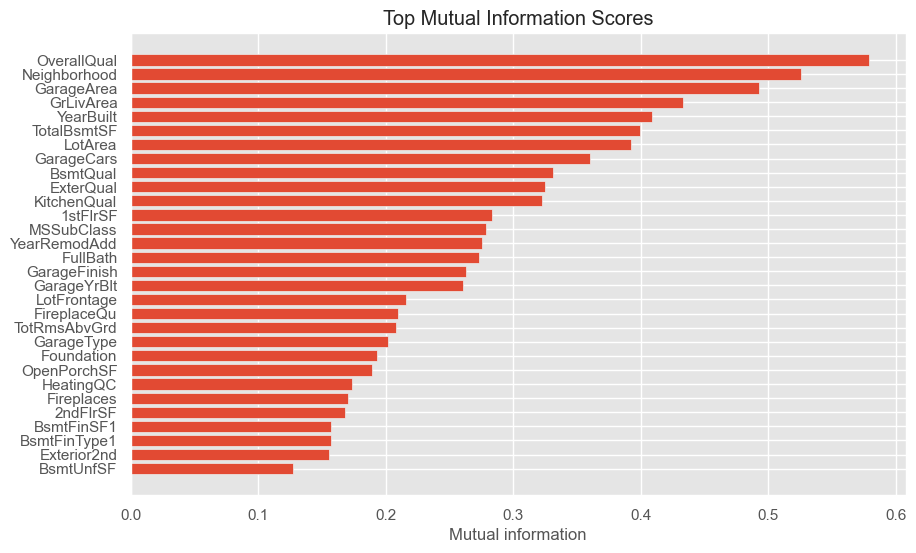

In [64]:
def make_mi_scores(X, y):
    '''
    Gets a rough mutual information score with trivial catagorical encoding and dropping nan
    '''
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Top Mutual Information Scores")
    plt.xlabel('Mutual information')


df_preproces = df.copy()
df_preproces.dropna(inplace=True)
X = df_preproces.iloc[:,:-1].copy()
y = df_preproces.iloc[:,-1].copy()
mi_scores = make_mi_scores(X,y)

plt.figure(dpi=100, figsize=(10, 6))
plot_mi_scores(mi_scores.iloc[0:30])

In [65]:
mi_scores

OverallQual      5.786503e-01
Neighborhood     5.253900e-01
GarageArea       4.927946e-01
GrLivArea        4.328080e-01
YearBuilt        4.087151e-01
TotalBsmtSF      3.995179e-01
LotArea          3.924269e-01
GarageCars       3.601015e-01
BsmtQual         3.313983e-01
ExterQual        3.251496e-01
KitchenQual      3.224720e-01
1stFlrSF         2.832649e-01
MSSubClass       2.781834e-01
YearRemodAdd     2.756588e-01
FullBath         2.731560e-01
GarageFinish     2.629453e-01
GarageYrBlt      2.608812e-01
LotFrontage      2.160922e-01
FireplaceQu      2.093477e-01
TotRmsAbvGrd     2.079625e-01
GarageType       2.019024e-01
Foundation       1.929394e-01
OpenPorchSF      1.890468e-01
HeatingQC        1.735858e-01
Fireplaces       1.702530e-01
2ndFlrSF         1.678137e-01
BsmtFinSF1       1.566927e-01
BsmtFinType1     1.566483e-01
Exterior2nd      1.550760e-01
BsmtUnfSF        1.273479e-01
Exterior1st      1.262990e-01
MSZoning         1.212281e-01
OverallCond      1.096556e-01
WoodDeckSF

As there are a lot of variables in this dataset, I will now select the most promising initial columns to analysis further. These are based of the mutual information values measured above and some intuition. It should be noted that these columnes are only a starting point and I plan on introducing other columnes back in later but, analysing all 81 columnes as this point would be overwhelming.

I prefer to use this method for droping columns (instead of say .drop) as I think its easier to visualise what has been dropped and what still remains when there's lots of columnes.

In [66]:
mi_scores.iloc[0:20].index

Index(['OverallQual', 'Neighborhood', 'GarageArea', 'GrLivArea', 'YearBuilt',
       'TotalBsmtSF', 'LotArea', 'GarageCars', 'BsmtQual', 'ExterQual',
       'KitchenQual', '1stFlrSF', 'MSSubClass', 'YearRemodAdd', 'FullBath',
       'GarageFinish', 'GarageYrBlt', 'LotFrontage', 'FireplaceQu',
       'TotRmsAbvGrd'],
      dtype='object')

In [67]:
df = df[['OverallQual', 'Neighborhood', 'GarageArea', 'GrLivArea', 'YearBuilt',
       'TotalBsmtSF', 'LotArea', 'GarageCars', 'BsmtQual', 'ExterQual',
       'KitchenQual', '1stFlrSF', 'MSSubClass', 'YearRemodAdd', 'FullBath',
       'GarageFinish', 'GarageYrBlt', 'LotFrontage', 'FireplaceQu',
       'TotRmsAbvGrd', 'SalePrice']].copy()
df.head(10)

,OverallQual,Neighborhood,GarageArea,GrLivArea,YearBuilt,TotalBsmtSF,LotArea,GarageCars,BsmtQual,ExterQual,KitchenQual,1stFlrSF,MSSubClass,YearRemodAdd,FullBath,GarageFinish,GarageYrBlt,LotFrontage,FireplaceQu,TotRmsAbvGrd,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,7,CollgCr,548,1710,2003,856,8450,2,Gd,Gd,Gd,856,60,2003,2,RFn,2003.0,65.0,None,8,208500
2,6,Veenker,460,1262,1976,1262,9600,2,Gd,TA,TA,1262,20,1976,2,RFn,1976.0,80.0,TA,6,181500
3,7,CollgCr,608,1786,2001,920,11250,2,Gd,Gd,Gd,920,60,2002,2,RFn,2001.0,68.0,TA,6,223500
4,7,Crawfor,642,1717,1915,756,9550,3,TA,TA,Gd,961,70,1970,1,Unf,1998.0,60.0,Gd,7,140000
5,8,NoRidge,836,2198,2000,1145,14260,3,Gd,Gd,Gd,1145,60,2000,2,RFn,2000.0,84.0,TA,9,250000
6,5,Mitchel,480,1362,1993,796,14115,2,Gd,TA,TA,796,50,1995,1,Unf,1993.0,85.0,None,5,143000
7,8,Somerst,636,1694,2004,1686,10084,2,Ex,Gd,Gd,1694,20,2005,2,RFn,2004.0,75.0,Gd,7,307000
8,7,NWAmes,484,2090,1973,1107,10382,2,Gd,TA,TA,1107,60,1973,2,RFn,1973.0,0.0,TA,7,200000
9,7,OldTown,468,1774,1931,952,6120,2,TA,TA,TA,1022,50,1950,2,Unf,1931.0,51.0,TA,8,129900


In [68]:
df.BsmtQual.nunique()

5

## Step 3: Feature Understanding

I will now take a peep at the SalePrices column itself and get a feeling for its spread etc.

Followed by 
(Univariate analysis)

* Plotting feature distributions
    * histograms
    * KDE
    * Boxplots

In [69]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

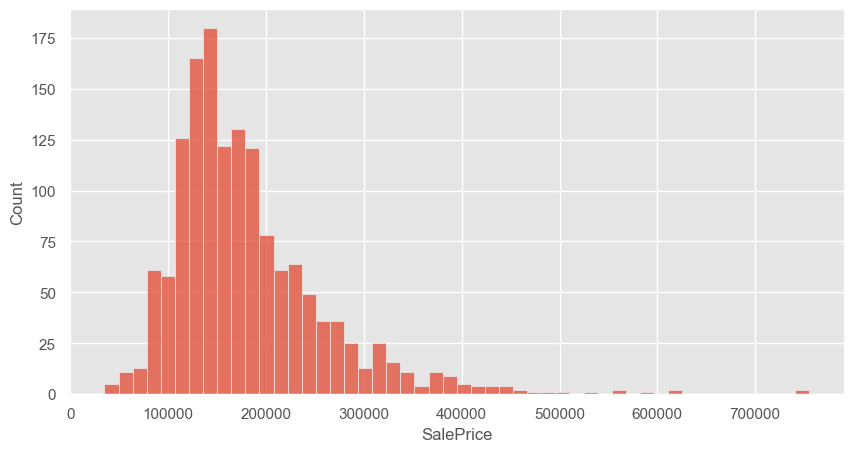

In [70]:
sns.histplot(df['SalePrice'], bins = 50);

The Sales Prices looks to be rather skewed from a normal distribution, with a long tail. Most values fall within 100000 and 300000. 

(Kurtoisis measures the tailedness of distribution with normal dist having values 3. 
kurtoisis >3 means it fat tails, <3 mean thin tails).

We can see the distribution is positively skewed and has a thick tail.

In [71]:
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


I will return to this skewness later after looking into other distributions. (spolier alert - the mighty log() function fixes this skewness)

Now I will look at the boxplot of each catagorical variable left with SalesPrice to see whethe the mutual information scores make sense and to get a feel for the data.

/var/folders/nf/5_b_mp0x2vz3b0mhxtksxt740000gn/T/ipykernel_57784/2176141780.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90, ha='center')


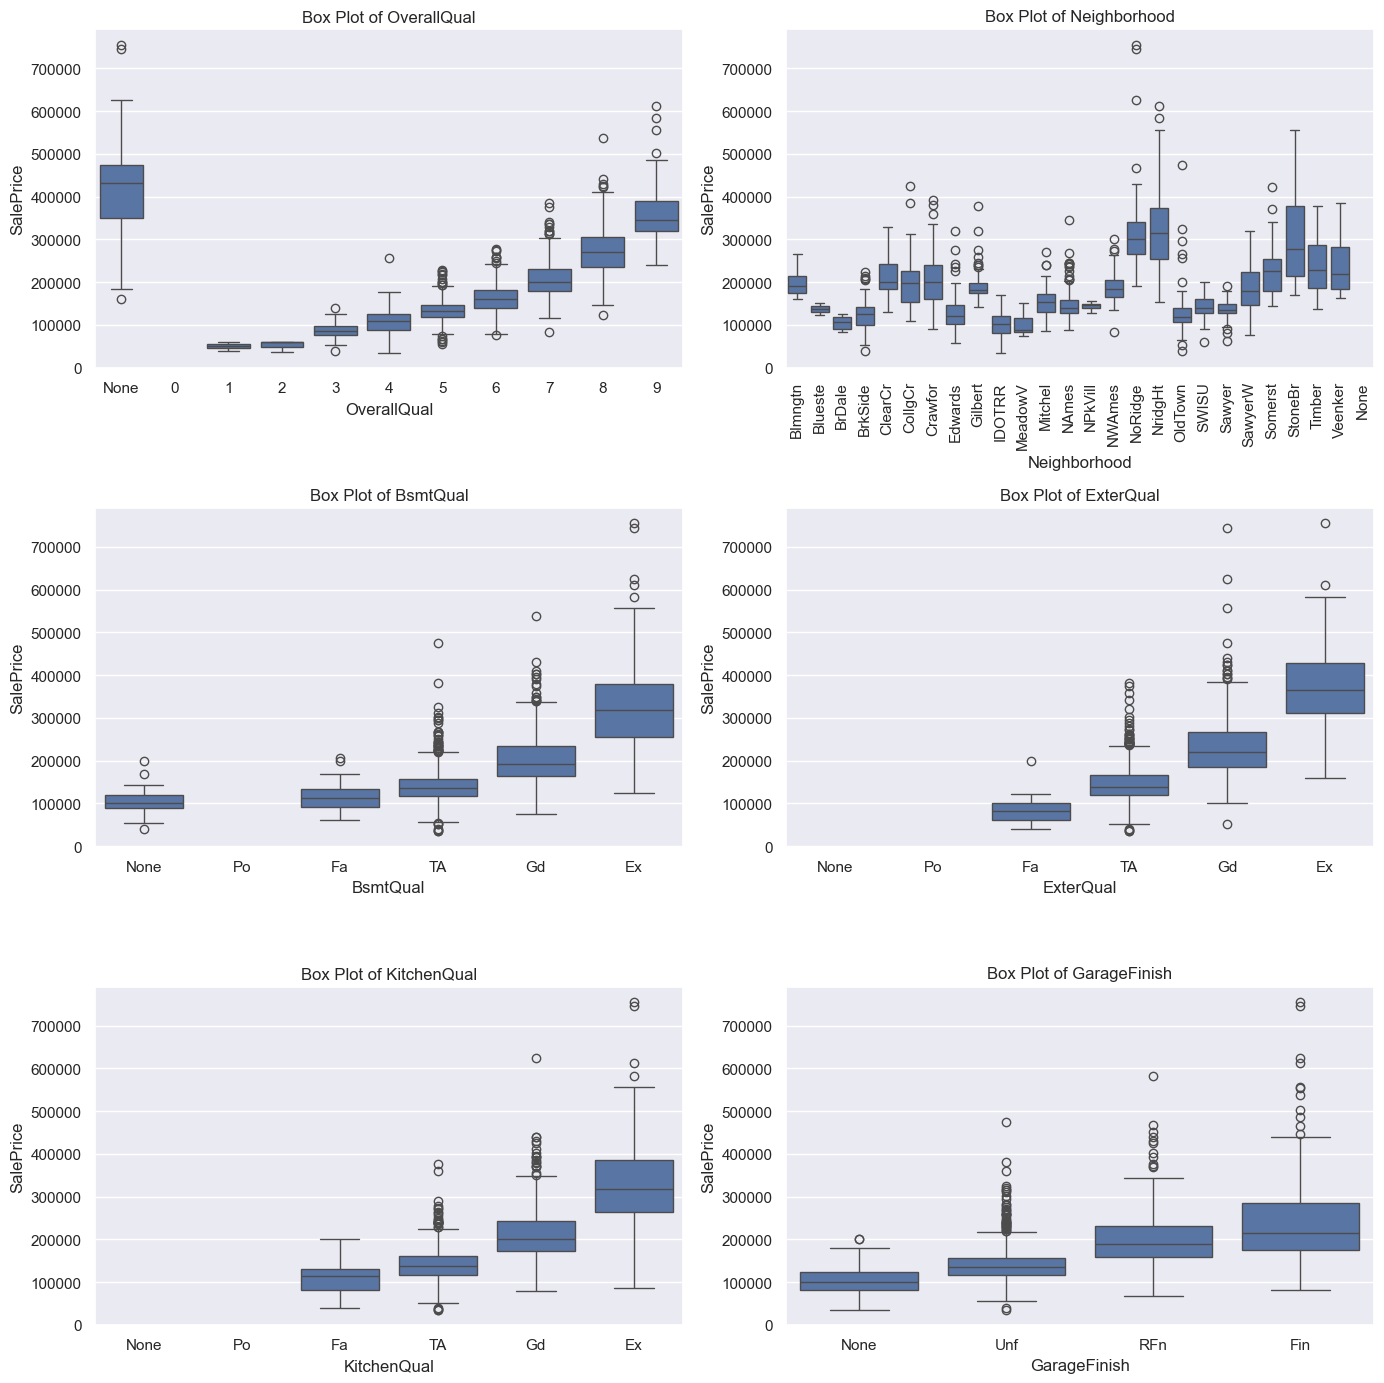

In [72]:
sns.set(rc={'figure.figsize': (10, 5)})

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 14))
axes = axes.flatten()

sns.boxplot(x='OverallQual', y='SalePrice', data=df, ax=axes[0])
axes[0].set_title('Box Plot of OverallQual')

sns.boxplot(x='Neighborhood', y='SalePrice', data=df, ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90, ha='center')
axes[1].set_title('Box Plot of Neighborhood')

sns.boxplot(x='BsmtQual', y='SalePrice', data=df, ax=axes[2])
axes[2].set_title('Box Plot of BsmtQual')

sns.boxplot(x='ExterQual', y='SalePrice', data=df, ax=axes[3])
axes[3].set_title('Box Plot of ExterQual')

sns.boxplot(x='KitchenQual', y='SalePrice', data=df, ax=axes[4])
axes[4].set_title('Box Plot of KitchenQual')

sns.boxplot(x='GarageFinish', y='SalePrice', data=df, ax=axes[5])
axes[5].set_title('Box Plot of GarageFinish')


plt.tight_layout()
plt.show()

We can clearly see there is a relationship between each catagorical variables selected and the SalePrice. This is a visual conformation of the selection of the highest MI score. I will explore the remaining variables later.

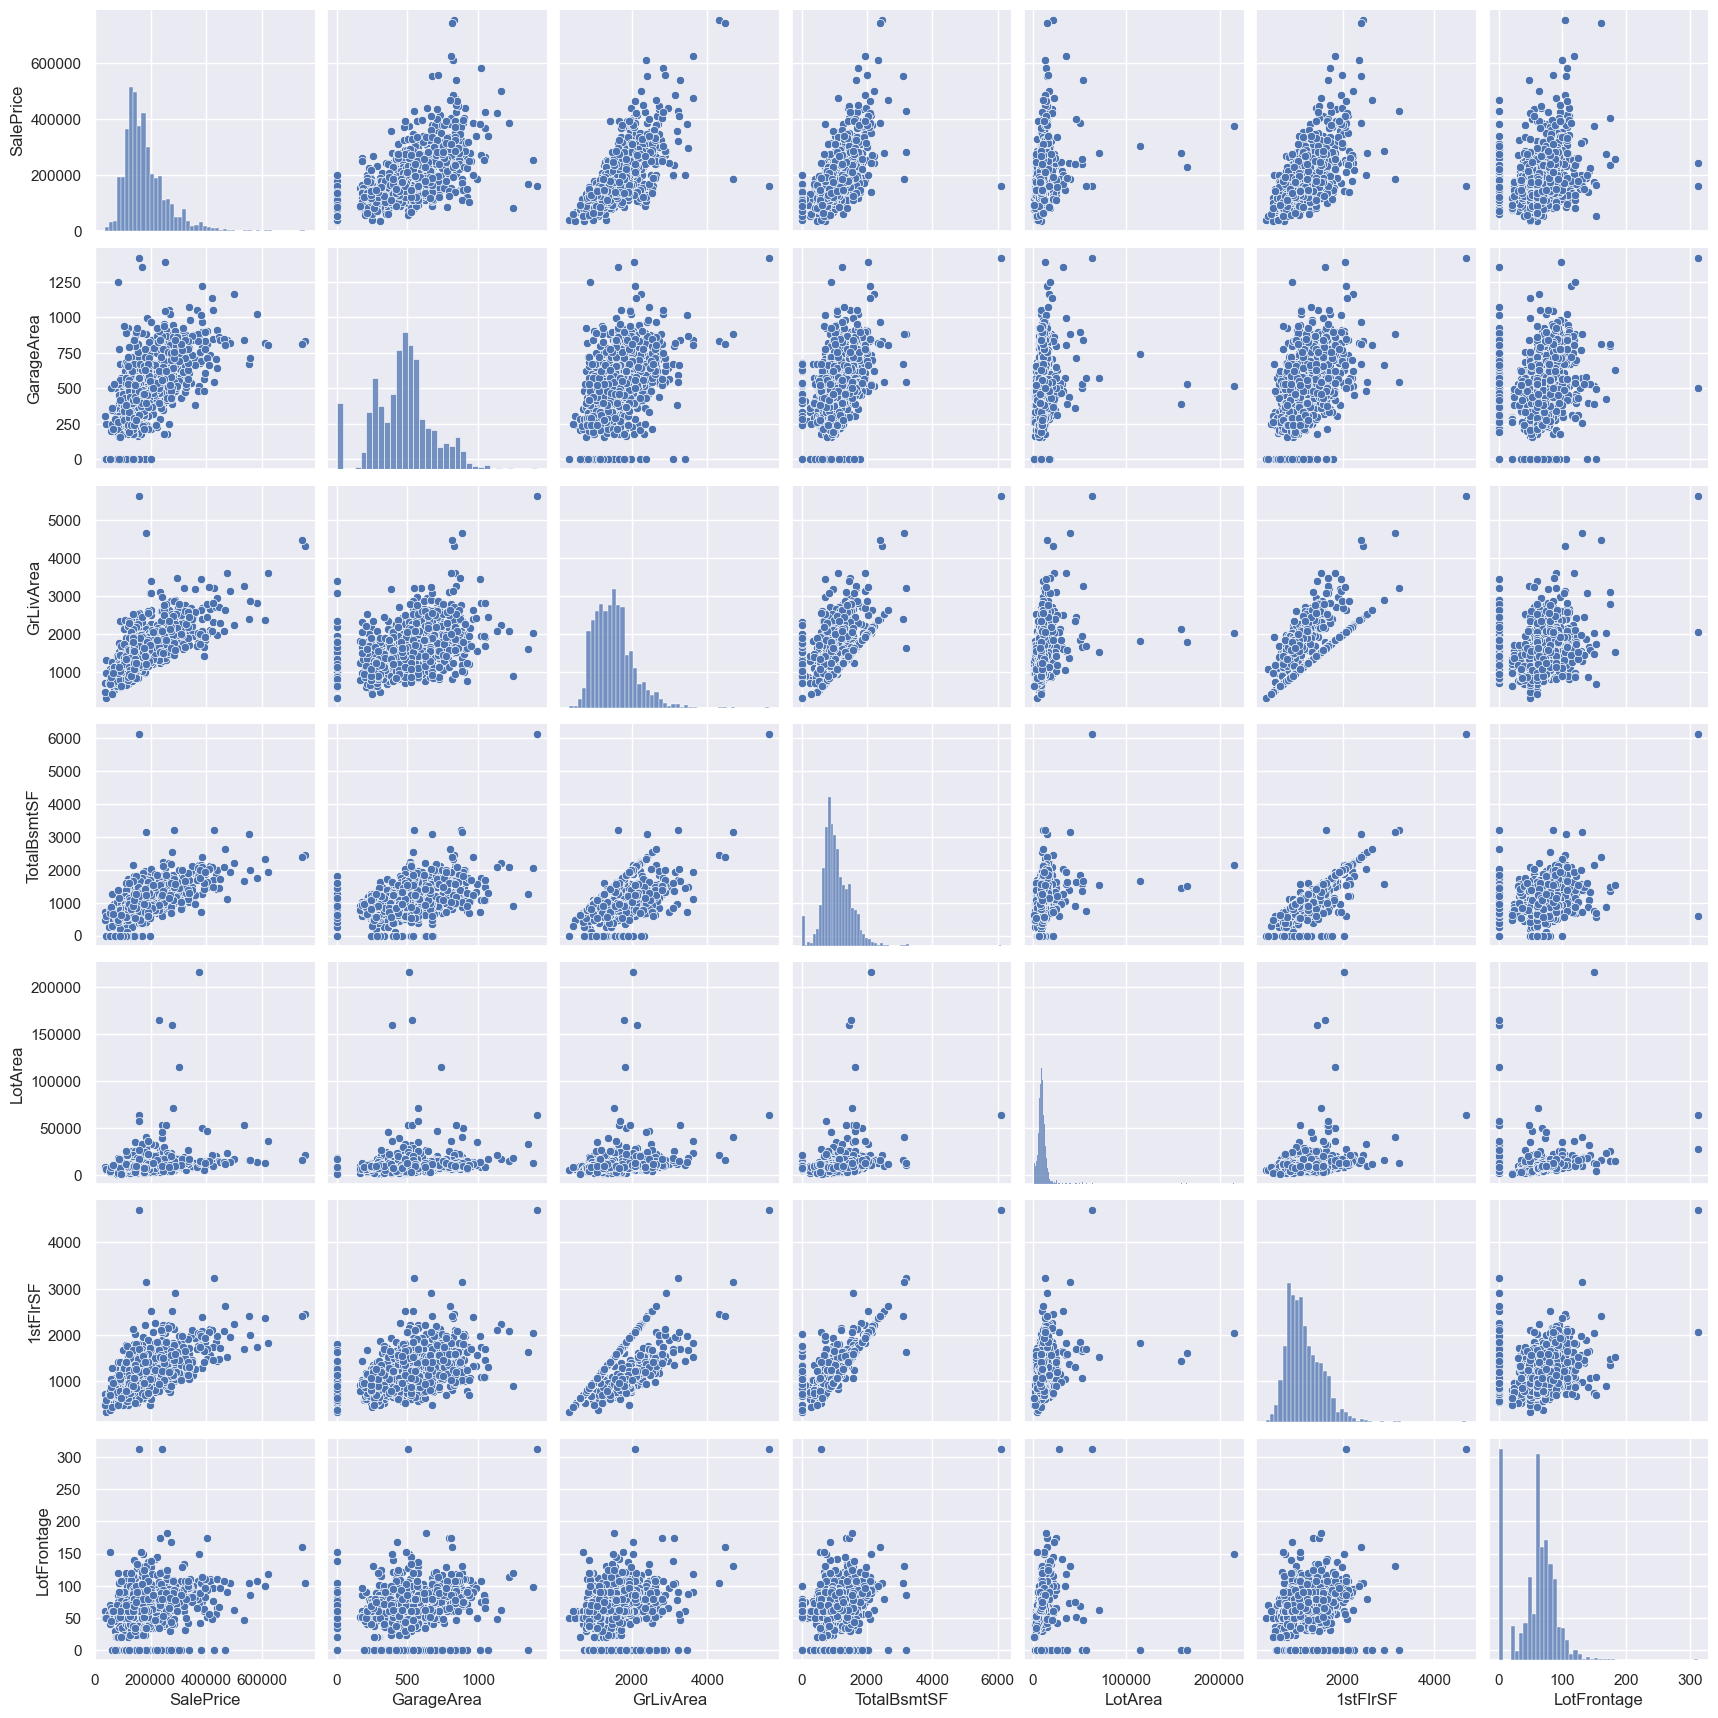

In [74]:
sns.pairplot(data=df,
             vars = ["SalePrice",'GarageArea', 'GrLivArea', 'TotalBsmtSF', 'LotArea', '1stFlrSF', 'LotFrontage'],
            );

The scatter plots of variable X against SalePrices all show some sort of correlation indicating these are probably good variables to include in my my.

The straight line in the GrLivArea and TotalBsmtSF stand out to me here. This strange relation is probably because a basement usually can't be larger than the footprint of a house i.e. a house's ground living area. Similar relationship with GrLivArea and 1stFlrSF (1st floor can't be bigger than the ground floor really).

### Outliers:
It is important to remove outliers from the training data to ensure the model learns correctly during training. Removing outliers is not always safe, here I only remove very large outliers.

There are two obvious outliers in the SalePrice vs GrLivArea plot. There are very large properties with a low price - possibly because they're argicultural properties or in the countryside with large land but undesirable location? 

In [76]:
df = df.drop(df[(df['SalePrice']<300000) & (df['GrLivArea'] > 4000)].index)

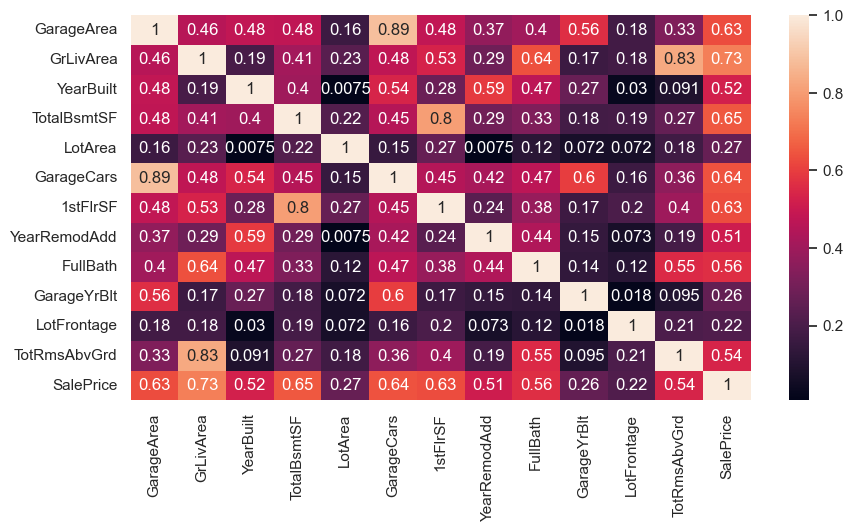

In [78]:
df_corr = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(df_corr, annot=True);

There are a few observations here to take note of:

Two varibles highly correlated together (as expect). Engineering these features may help improve a model performance as they may contain the same information (multicolinearity):
* GarageArea and GarageCars 
* TitRmsAbvGrd and GrLivArea 
* TotalBsmtSD and 1stFlrSF

Also should be noted (in the bottom row) all columns have a good correlation with SalePrice, once again indicating that these are good colums to include.


### Scaling: ML model typically like normally distributed variables

Note tree based models (Random Forest, XGBoost) don't care about skew but I will be trying lots of different models so exploring the skew here is important. 

In [37]:
def plot_norm_comparison(var):
    plt.figure(figsize=(7, 5))
    ax = sns.histplot(df[var], kde=True, stat="density");
    # Add the normal distribution overlay
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, np.mean(df[var]), np.std(df[var]))
    plt.plot(x, p, 'b', linewidth=2, label='Normal Distribution')
    # Display the plot
    plt.legend()
    plt.show()
    plt.figure(figsize=(7, 5))
    res = stats.probplot(df[var], plot=plt)

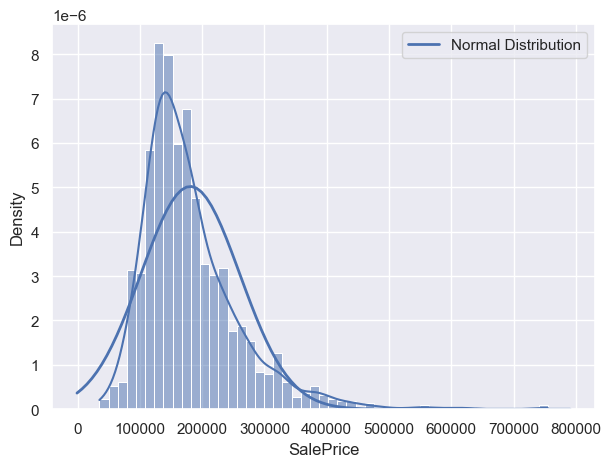

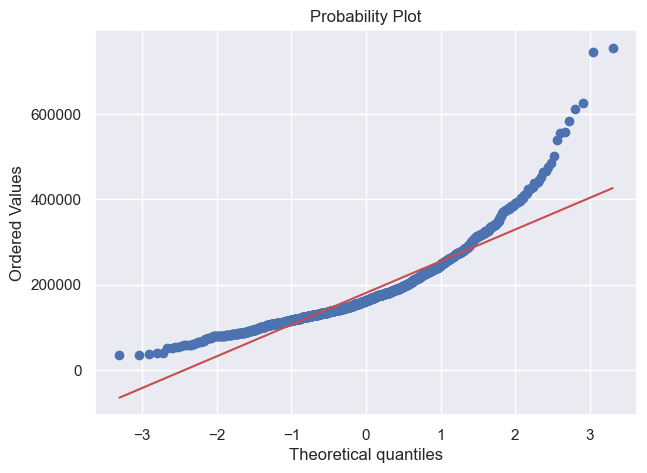

In [38]:
plot_norm_comparison('SalePrice')

If sales price fitted a normal curve well it would follow the straight line well. Curavture above the straight line suggests we should apply log function to the variable (positive skewness can be fixed using log).

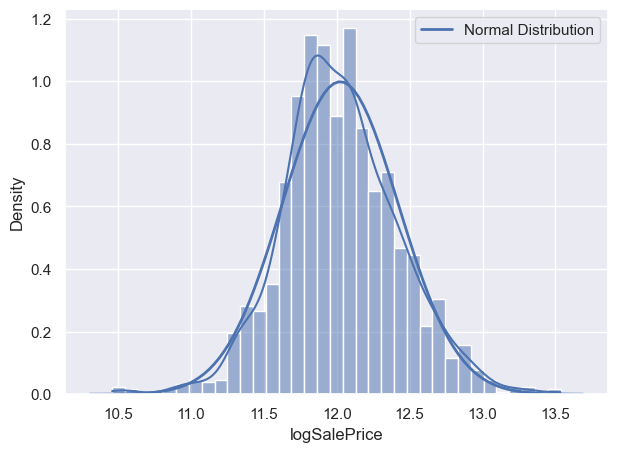

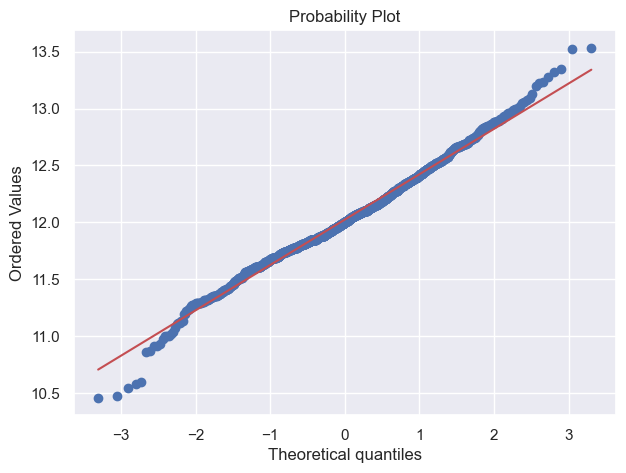

In [39]:
df['logSalePrice'] = np.log(df['SalePrice'])

plot_norm_comparison('logSalePrice')

Yay! This is much better. There is still an issure with the very tails of this distribution but overall looks ok! Tails are probably outliers which I will explore soon.

In [40]:
df.columns

Index(['OverallQual', 'Neighborhood', 'GarageArea', 'GrLivArea', 'YearBuilt',
       'TotalBsmtSF', 'LotArea', 'GarageCars', 'BsmtQual', 'ExterQual',
       'KitchenQual', '1stFlrSF', 'MSSubClass', 'YearRemodAdd', 'FullBath',
       'GarageFinish', 'GarageYrBlt', 'LotFrontage', 'FireplaceQu',
       'TotRmsAbvGrd', 'SalePrice', 'logSalePrice'],
      dtype='object')

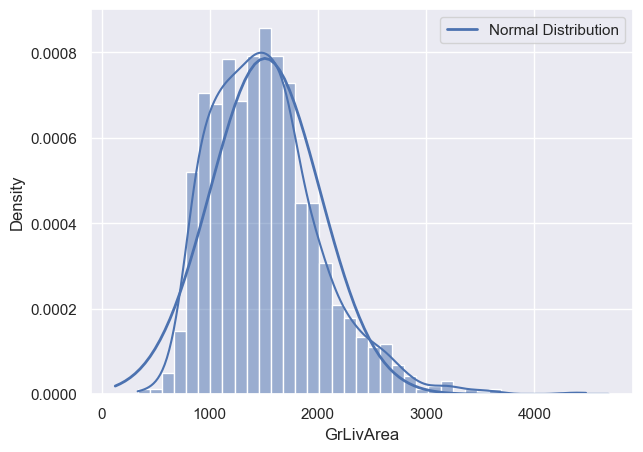

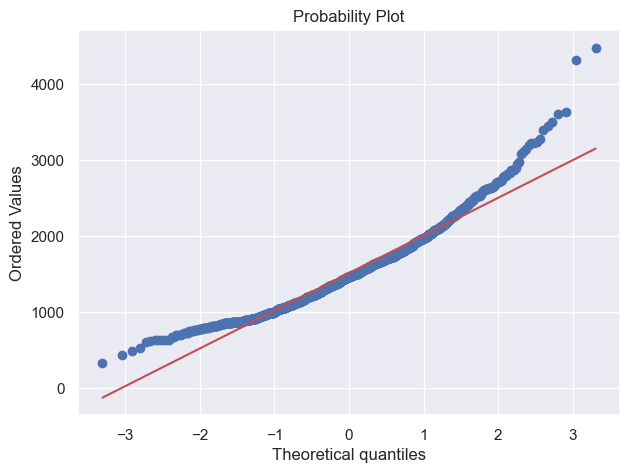

In [41]:
plot_norm_comparison('GrLivArea')

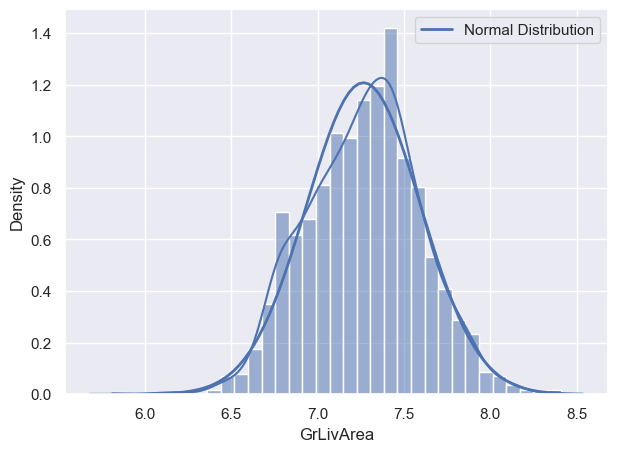

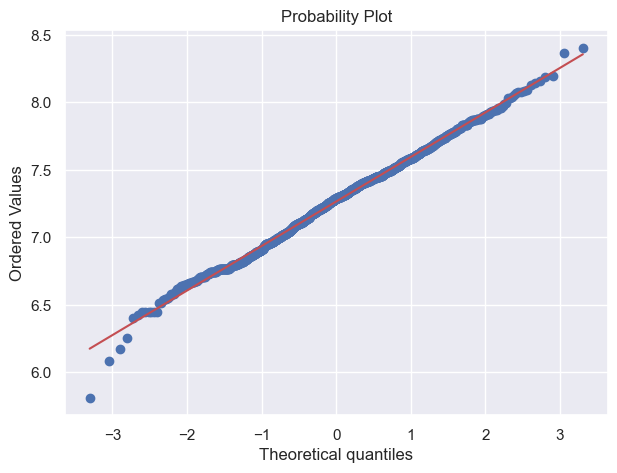

In [42]:
df['GrLivArea'] = np.log(df['GrLivArea'])
plot_norm_comparison('GrLivArea')

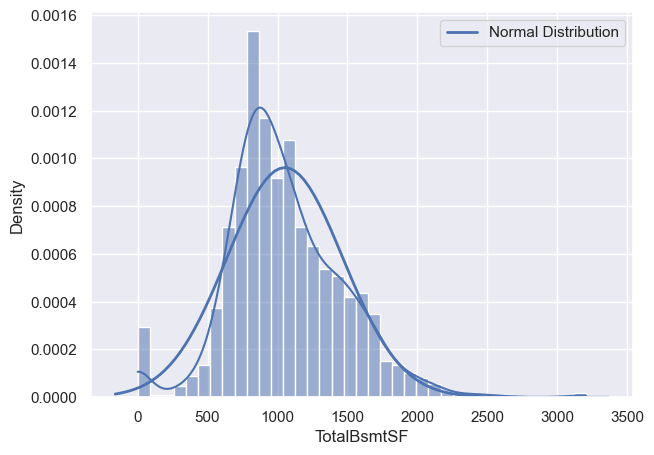

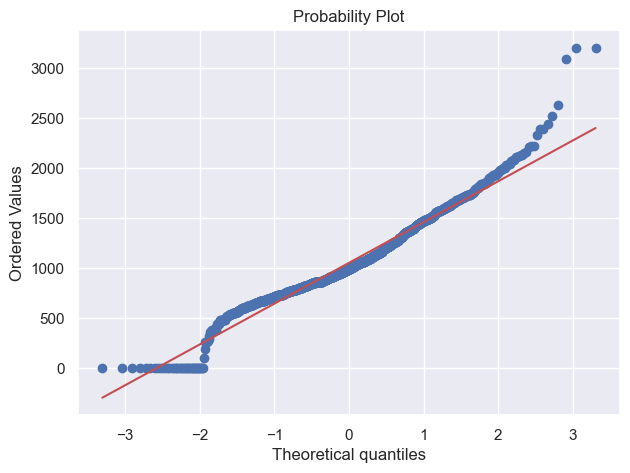

In [43]:
plot_norm_comparison('TotalBsmtSF')

/Users/edroberts/opt/anaconda3/envs/trading/lib/python3.12/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/edroberts/opt/anaconda3/envs/trading/lib/python3.12/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


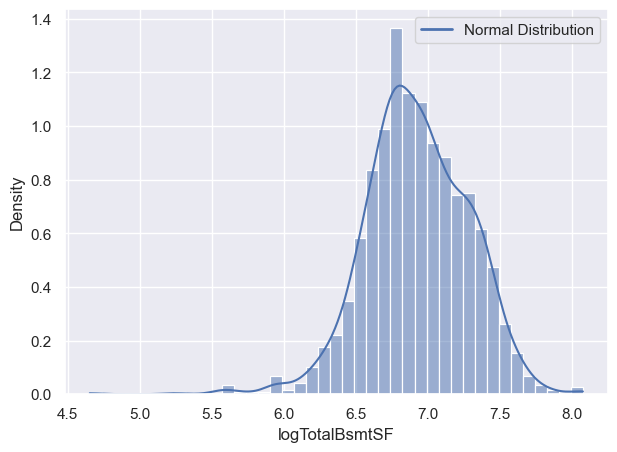

/Users/edroberts/opt/anaconda3/envs/trading/lib/python3.12/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


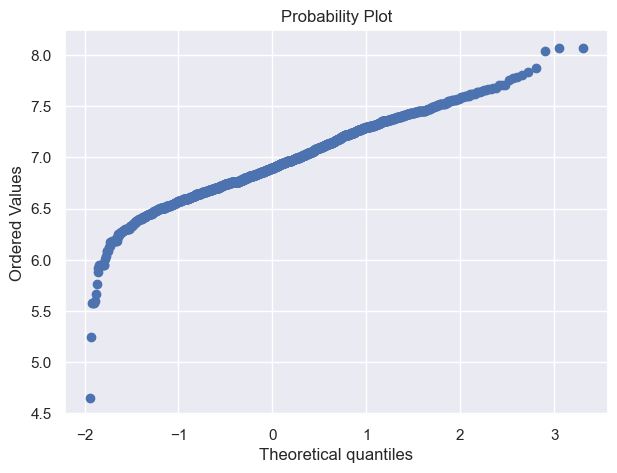

In [44]:
df['logTotalBsmtSF'] = np.log(df['TotalBsmtSF'])
plot_norm_comparison('logTotalBsmtSF')

# ----------- OLD --------------------------------------------
## Step 3: Feature Understanding 

(Univariate analysis)

* Plotting feature distributions
    * histograms
    * KDE
    * Boxplots

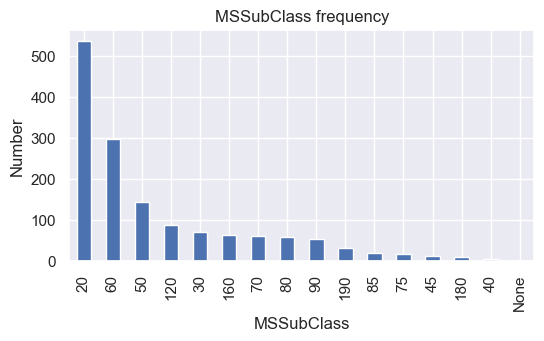

In [45]:
ax = df['MSSubClass'].value_counts() \
    .plot(kind='bar', 
        title = 'MSSubClass frequency', 
        figsize=(6, 3)
    )
ax.set_ylabel('Number');

One thing I've noticed in the data_description is MSSubClass is actually a catagorical data type so perhaps the number codes assigned to each catagory are not a good fit > a model might try to find a numerical relation between these numbers and sales prices... so perhaps another type of encodin gis required (though with 15 classes OneHot encoding may not work?!?!)

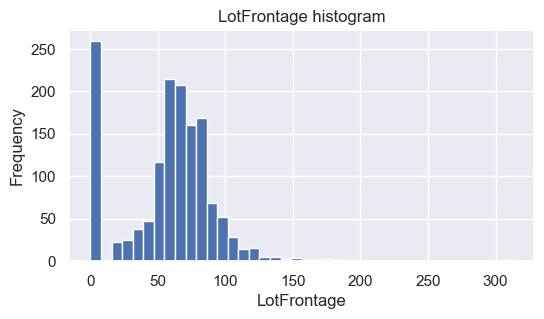

In [46]:
ax2 = df['LotFrontage'].plot(kind='hist',
                             bins=40,
                             title='LotFrontage histogram',
                             figsize=(6,3))
ax2.set_xlabel("LotFrontage");

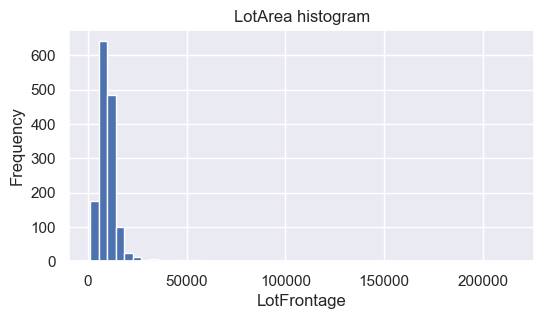

In [47]:
ax = df['LotArea'].plot(kind='hist',
                        bins=50,
                        title='LotArea histogram',
                        figsize=(6,3))
ax.set_xlabel("LotFrontage");

## Step 4: Feature relationships
* Scatter plot
* Heatmap correlation
* Pairplot
* Groupby comparisons


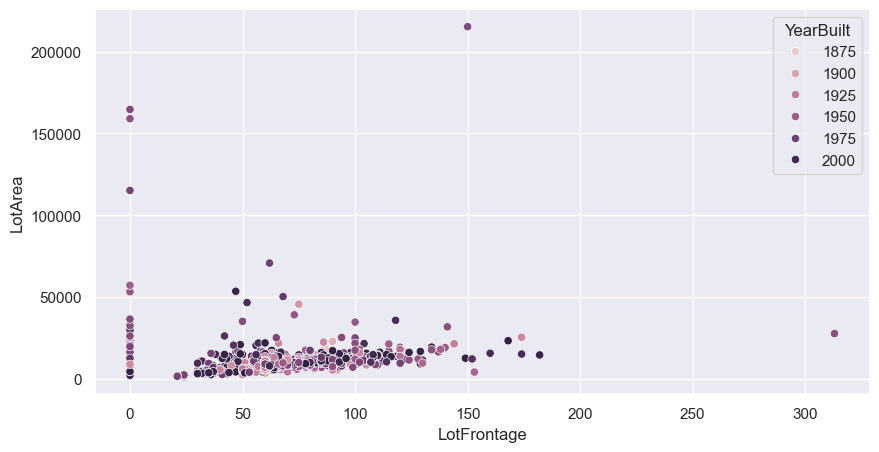

In [48]:
sns.scatterplot(x='LotFrontage',
            y='LotArea',
            hue='YearBuilt',
            data = df);

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

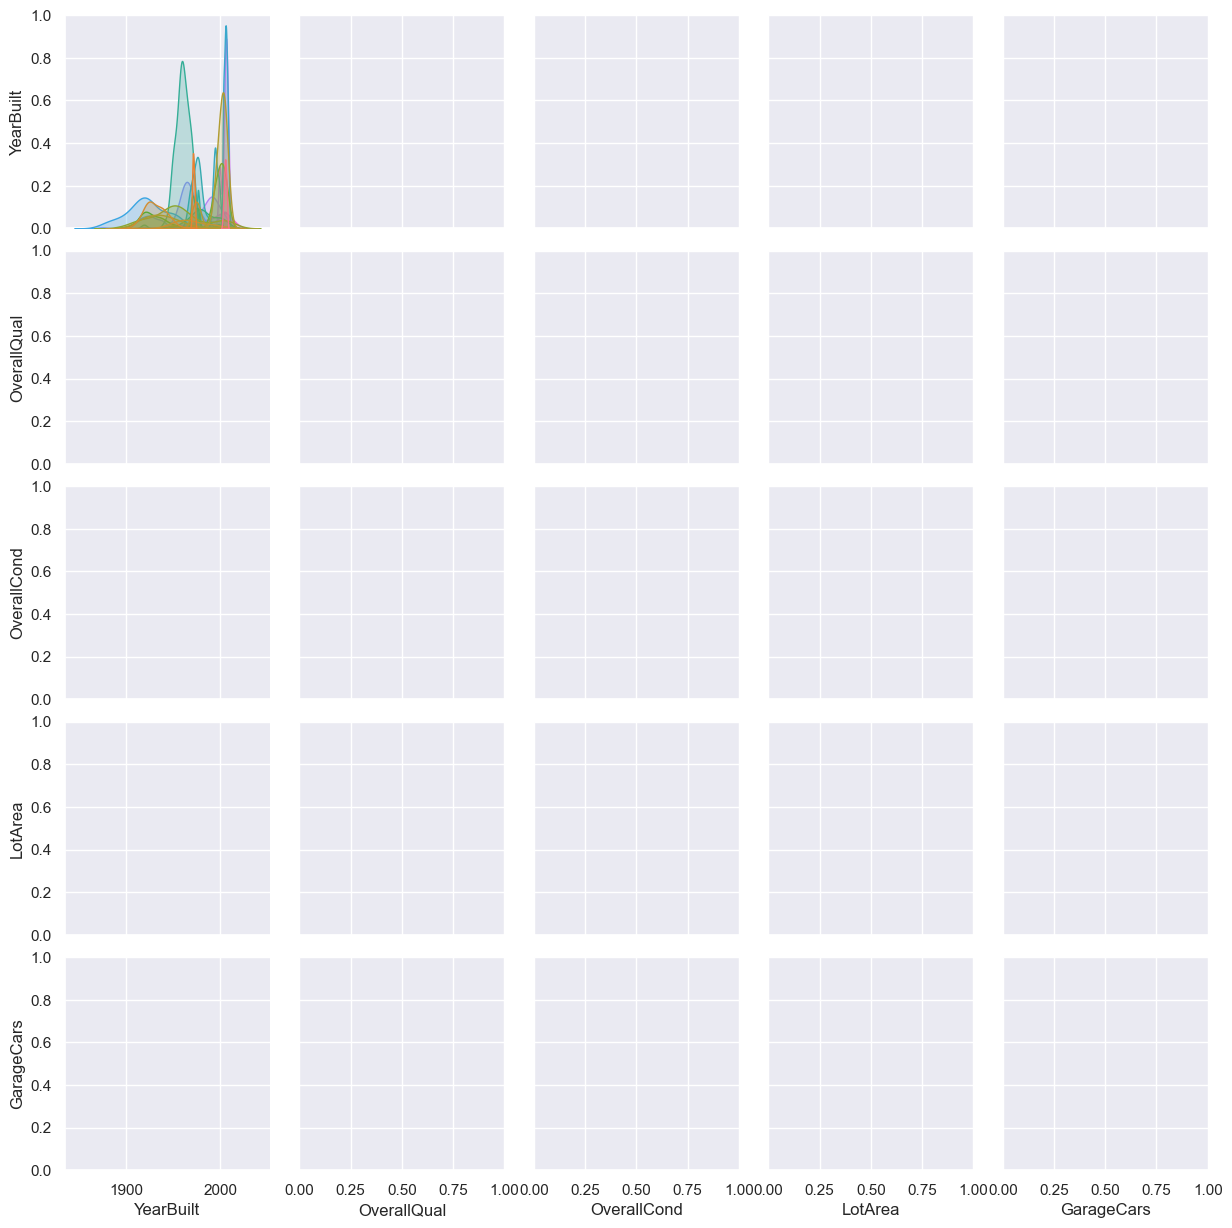

In [49]:
sns.pairplot(data=df,
             vars = ["YearBuilt",'OverallQual', 'OverallCond', 'LotArea', 'GarageCars'],
             hue='Neighborhood');

In [ ]:
# Work out what area has the most expenisve houses (just pratice using pandas query etc)